# Kalorimetrie Laborversuch

Author: Paul Zündel

Datum: 11.12.2023

Gruppe: 99

## Forschungsfrage

Feststellung der Wärmekapazitäten verschiedener Werkstoffe aus Metall und Kunststoff mit Hilfe der auch zu bestimmenden Kalorimeterkonstante.

## Versuchsaufbau und Durchführung

Eine Wage. Püfstand mit Wasserbad, welches auf 80°C geheizt wird, und Kalorimeter. 5 Temperatursensoren. 3 in dem Kalorimeter. 1 im Wasserbad. 1 in der Umgebung.
Durchführung: Zuerst die Kalorimeterkonstante mit Hilfe der zugeführten Wärmeenergie und der entstandenen Temperatur des Wassers bestimmen. Danach Proben in Wasserbad auf 80°C aufheuzen und in Kalorimeter geben und Temperaturänderungen messen. Mit den entstehenden Werten die Wärmekapazität berechnen.

<img src="figures/VersuchsaufbauLabor.jpg" width="800">


## Versuchsauswertung

In [143]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [144]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = "data/Kalorimeterkonstante99/Kalorimeterkonstante99.h5"

# DONE #

In [145]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const, 'RawData')

# DONE #

{'temperature': array([[20.6875, 20.75  , 20.8125, 20.75  , 20.75  , 20.8125, 20.75  ,
        20.75  , 20.75  , 20.75  , 20.75  , 20.8125, 20.8125, 20.875 ,
        20.9375, 20.9375, 21.0625, 21.125 , 21.1875, 21.1875, 21.375 ,
        21.5   , 21.5625, 21.625 , 21.8125, 21.875 , 22.    , 22.0625,
        22.125 , 22.1875, 22.3125, 22.375 , 22.4375, 22.4375, 22.625 ,
        22.75  , 22.8125, 22.9375, 23.    , 23.125 , 23.1875, 23.25  ,
        23.375 , 23.4375, 23.5625, 23.6875, 23.75  , 23.8125, 23.875 ,
        24.    , 24.0625, 24.1875, 24.25  , 24.375 , 24.4375, 24.5   ,
        24.625 , 24.6875, 24.75  , 24.875 , 24.9375, 25.0625, 25.125 ,
        25.25  , 25.375 , 25.375 , 25.4375, 25.5625, 25.5625, 25.5625,
        25.625 , 25.6875, 25.625 ],
       [20.8125, 20.8125, 20.8125, 20.8125, 20.75  , 20.8125, 20.75  ,
        20.8125, 20.75  , 20.8125, 20.75  , 20.8125, 20.8125, 20.9375,
        20.9375, 21.    , 21.0625, 21.1875, 21.25  , 21.3125, 21.4375,
        21.5625, 21.625 ,

In [146]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

index_calorimeter = [0, 1, 2]
index_environment = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [147]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_environment])

# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

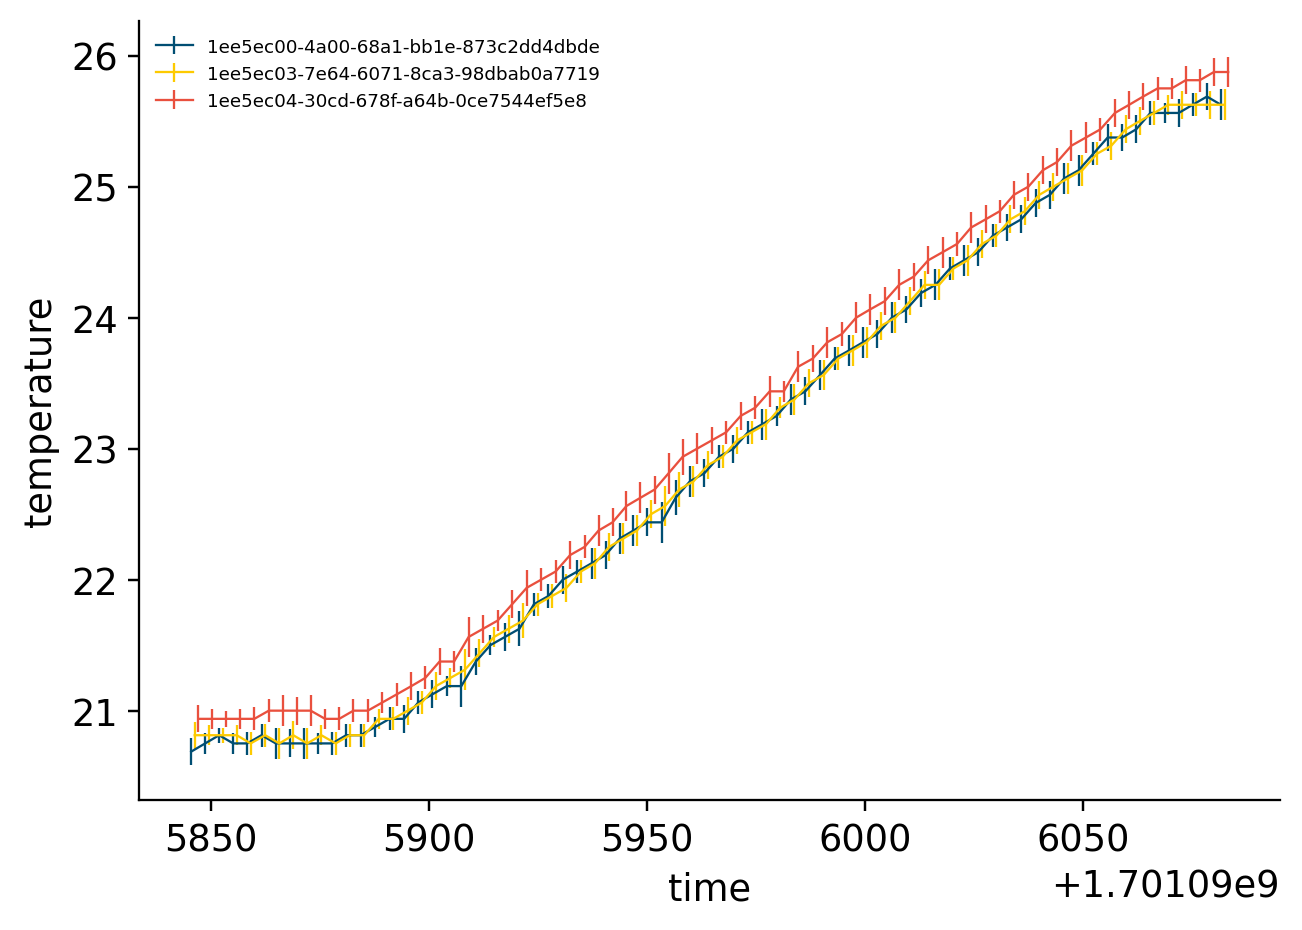

In [148]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting

utility.plot_temp_over_time([data_dict["temperature"][index_calorimeter], mean_std_calorimeter],data_dict["timestamp"][index_calorimeter], data_dict["name"][index_calorimeter], "time", "temperature" )

# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [149]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.

import json
path_c = "data/Kalorimeterkonstante99/calorimeter_1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753.json"
with open(path_c, 'r') as f:
  cal = json.load(f)

water_mass = cal["calorimeter"]["medium"]["mass"]["value"]
print(water_mass)

# DONE #

400


In [150]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.

f = h5.File(datafile_path_const, "r") 
    
a = f["RawData"]
b = list(a)[0]
a = a[b]
    
b= list(a)[0]

current = a["Current"][()]
heat_time = a["Time"][()]
voltage = a["Voltage"][()]
print(current)
print(heat_time)
print(voltage)

# DONE #

4.1
180.0
13.1


#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [151]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_end, temperature_start = utility.get_start_end_temperature(data_dict['temperature'])
print(temperature_end) 
print(temperature_start)


# DONE #

25.30188679245283
21.174388111888113


#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [152]:
# TODO: Calculate heat capacity of the calorimeter

calorimeter_constant = voltage*current*180/(temperature_end-temperature_start)

# DONE #

#### (Vii) Ergebnis

In [153]:
calorimeter_constant

2342.2902702605516

### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [154]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_probe1 = "data/Probe001/Probe001.h5"

# DONE #

In [155]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_probe1, "RawData")

# DONE #

{'temperature': array([[20.25  , 20.1875, 20.1875, 20.1875, 20.1875, 20.25  , 20.25  ,
        20.25  , 20.25  , 20.9375, 22.5625, 22.5625, 25.1875, 26.125 ,
        26.8125, 26.8125, 27.625 , 27.9375, 28.125 , 28.25  , 28.375 ,
        28.4375, 28.4375, 28.5   , 28.5625, 28.5625, 28.5625, 28.5625,
        28.625 , 28.625 , 28.625 , 28.625 , 28.625 , 28.625 , 28.5625,
        28.5625, 28.5625, 28.5625, 28.5625],
       [20.1875, 20.1875, 20.1875, 20.1875, 20.25  , 20.1875, 20.25  ,
        20.25  , 20.25  , 21.3125, 22.9375, 24.375 , 25.5   , 26.375 ,
        26.9375, 27.375 , 27.75  , 28.    , 28.1875, 28.3125, 28.375 ,
        28.4375, 28.5   , 28.5625, 28.5625, 28.625 , 28.5625, 28.5625,
        28.5625, 28.5625, 28.625 , 28.625 , 28.625 , 28.5625, 28.5625,
        28.5625, 28.5625, 28.5625, 28.5625],
       [20.375 , 20.375 , 20.375 , 20.375 , 20.375 , 20.375 , 20.375 ,
        20.375 , 20.5   , 21.75  , 23.5   , 24.875 , 25.9375, 26.75  ,
        27.3125, 27.75  , 28.0625, 28.3125

In [156]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [157]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])

# DONE #

#### (iii) Daten ploten

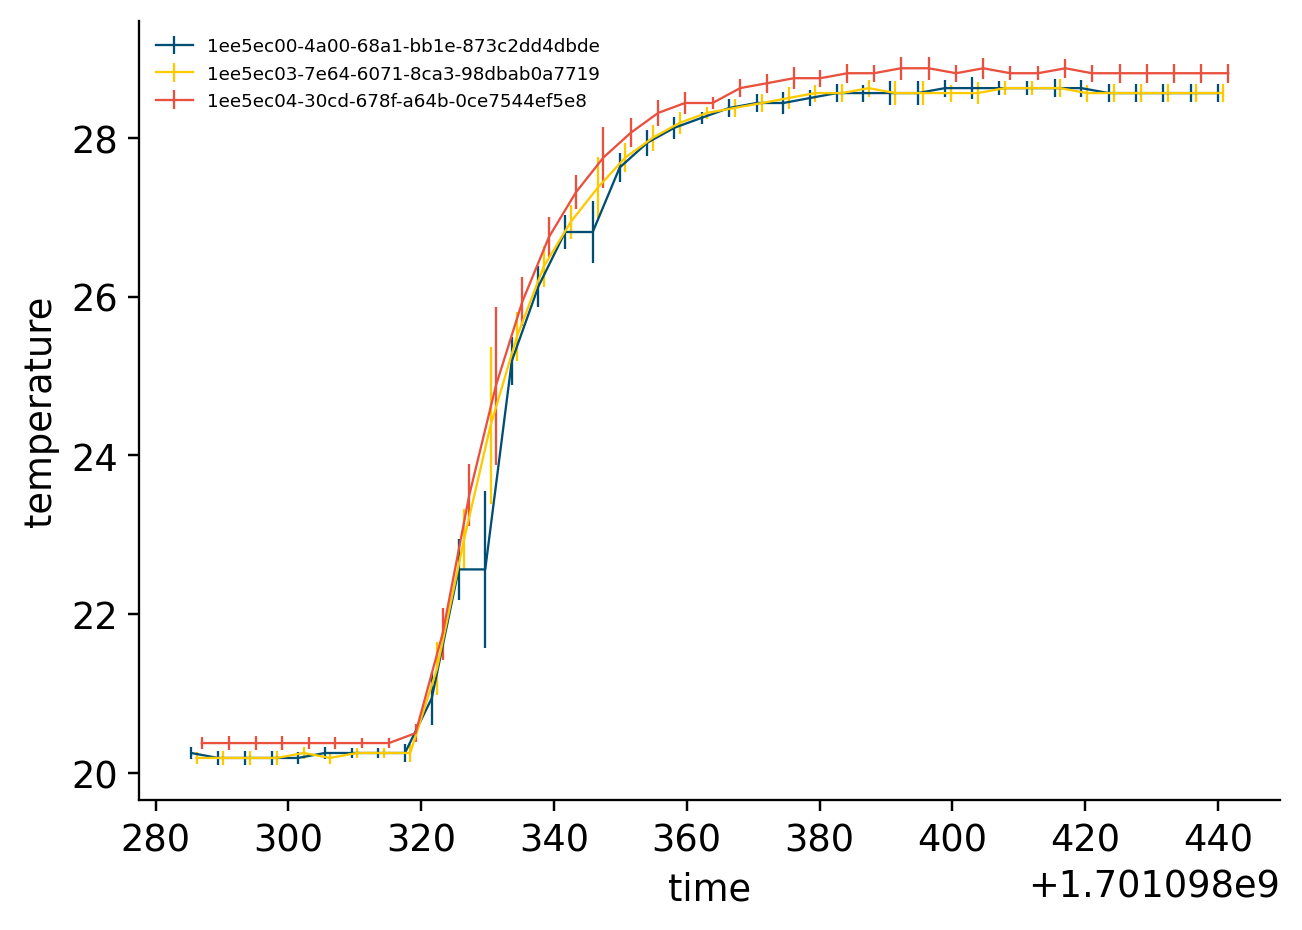

In [158]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time([data_dict["temperature"][index_calorimeter], mean_std_calorimeter],data_dict["timestamp"][index_calorimeter], data_dict["name"][index_calorimeter], "time", "temperature" )
# DONE #

#### (iv) Metadaten auslesen

In [159]:
# TODO: Read mass of the sample from the metadata of the experiment.

path_p = "data/Probe001/probe_PDC001_1ee8d291-6ba4-678c-89f4-f2344e8ca2de.json"
with open(path_p, 'r') as f:
  p01 = json.load(f)
sample_mass = p01["probe"]["mass"]["value"]
print(sample_mass)

# DONE #

630


#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [160]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

threshold = 33/data_dict["timestamp"][0][-1]
temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter[0], threshold) 
print(temperature_mix, temperature_start_water) 

# DONE #

28.708333333333332 20.25


In [161]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

temperature_start_sample = np.mean(mean_std_heater[0][0:10])
print(temperature_start_sample)


# DONE #

79.84294871794872


#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [162]:
# TODO: Calulate specific heat capacity of the sample.
sample_mass_kg = sample_mass/1000
sample_heat_capacity = calorimeter_constant*(temperature_mix-temperature_start_water)/(sample_mass_kg*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [163]:
print(sample_heat_capacity)


614.9927095177997


### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [164]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_probe2 = "data/Probe010/Probe010.h5"

# DONE #

In [165]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_probe2, "RawData")

# DONE #

{'temperature': array([[20.0625, 20.0625, 20.0625, 20.0625, 20.0625, 20.0625, 20.125 ,
        20.125 , 20.125 , 20.125 , 20.3125, 20.625 , 20.625 , 21.1875,
        21.375 , 21.5625, 21.75  , 21.875 , 22.    , 22.125 , 22.25  ,
        22.3125, 22.4375, 22.5   , 22.5625, 22.625 , 22.75  , 22.75  ,
        22.875 , 22.875 , 22.9375, 23.    , 23.0625, 23.0625, 23.125 ,
        23.1875, 23.1875, 23.1875, 23.25  , 23.3125, 23.3125, 23.375 ,
        23.375 , 23.375 , 23.4375, 23.4375, 23.5   , 23.5   , 23.5   ,
        23.5625, 23.5625, 23.5625, 23.5625, 23.625 , 23.625 , 23.625 ,
        23.625 , 23.625 , 23.625 , 23.6875, 23.6875, 23.6875, 23.6875,
        23.6875, 23.6875, 23.6875, 23.6875, 23.75  , 23.75  , 23.75  ],
       [20.125 , 20.125 , 20.125 , 20.125 , 20.125 , 20.125 , 20.1875,
        20.1875, 20.125 , 20.1875, 20.4375, 20.4375, 21.    , 21.25  ,
        21.4375, 21.625 , 21.75  , 21.9375, 22.    , 22.125 , 22.25  ,
        22.3125, 22.3125, 22.5   , 22.5625, 22.625 , 22.625 

In [166]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [167]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])


# DONE #

#### (iii) Daten ploten

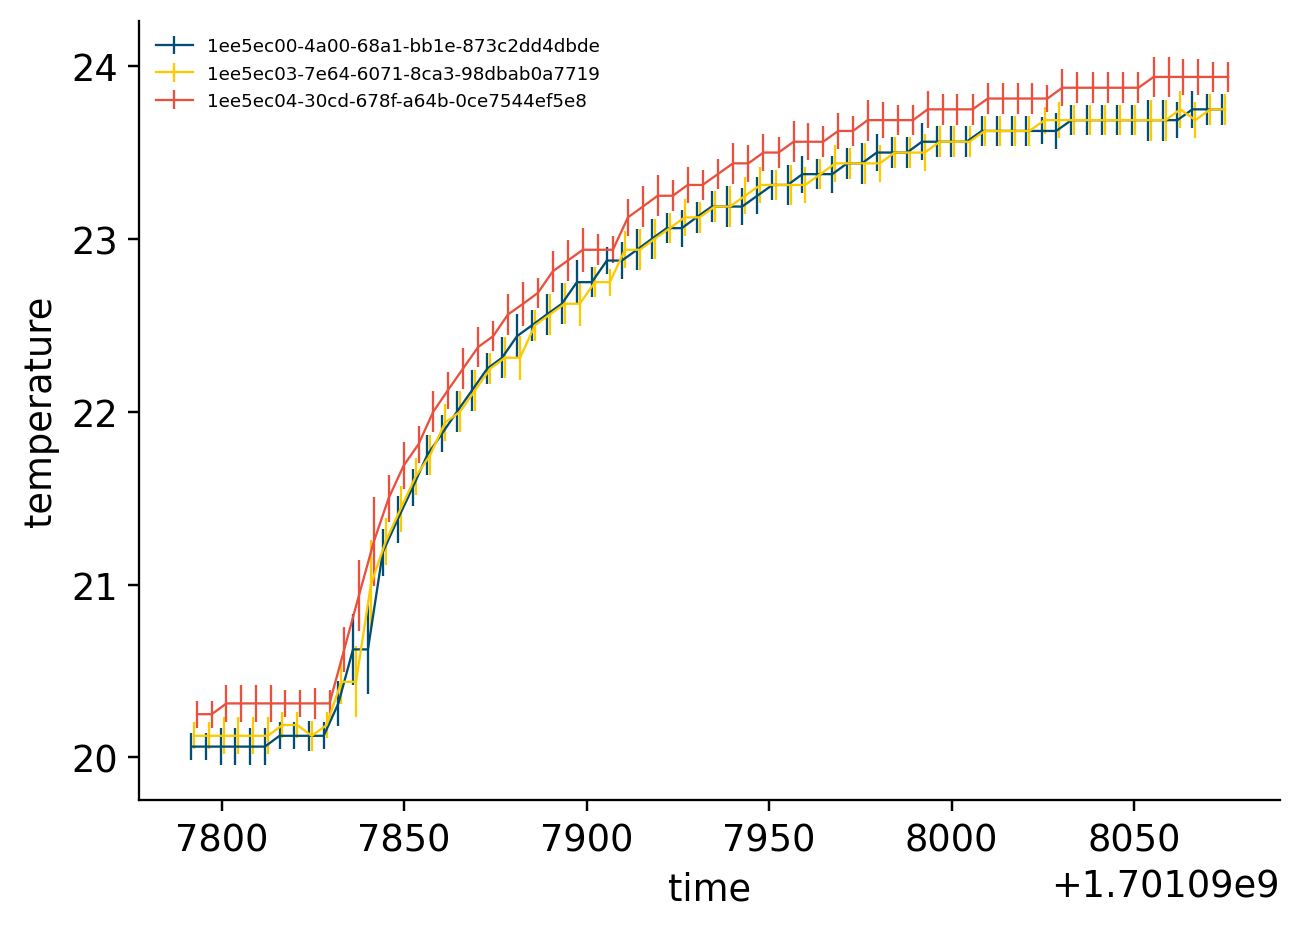

In [168]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.
utility.plot_temp_over_time([data_dict["temperature"][index_calorimeter], mean_std_calorimeter],data_dict["timestamp"][index_calorimeter], data_dict["name"][index_calorimeter], "time", "temperature" )

# DONE #

#### (iv) Metadaten auslesen

In [169]:
# TODO: Read mass of the sample from the metadata of the experiment.

path_p = "data/Probe010/probe_PDC010_1ee8d292-f725-6edb-b8cb-5085434639e2.json"
with open(path_p, 'r') as f:
  p10 = json.load(f)
sample_mass = p10["probe"]["mass"]["value"]
print(sample_mass)


# DONE #

110


#### (v) Anfangs- und Endwert der Temperatur

In [170]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

threshold = 33/data_dict["timestamp"][0][-1]
temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter[0], threshold) 
print(temperature_mix, temperature_start_water)

# DONE #

23.8125 20.145833333333332


In [171]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(mean_std_heater[0][0:10])
print(temperature_start_sample)


# DONE #

79.75446428571429


#### (vi) spezifische Wärmekapazität bestimmen

In [172]:
# TODO: Calulate specific heat capacity of the sample.

sample_mass_kg = sample_mass/1000
sample_heat_capacity = calorimeter_constant*(temperature_mix-temperature_start_water)/(sample_mass_kg*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [173]:
print(sample_heat_capacity)


1395.6668011022361


### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [174]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_probe3 = "data/Probe016/Probe016.h5"

# DONE #

In [175]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_probe3, "RawData")

# DONE #

{'temperature': array([[20.25  , 20.3125, 20.375 , 20.3125, 20.3125, 20.375 , 20.3125,
        20.375 , 20.3125, 20.3125, 21.25  , 22.6875, 23.875 , 24.6875,
        25.1875, 25.5   , 25.5   , 25.8125, 25.875 , 25.9375, 26.    ,
        26.0625, 26.0625, 26.    , 26.    , 26.0625, 26.0625, 26.125 ,
        26.0625, 26.0625, 26.0625, 26.0625, 26.0625, 26.0625, 26.0625,
        26.0625, 26.0625, 26.0625],
       [20.375 , 20.3125, 20.375 , 20.375 , 20.375 , 20.375 , 20.375 ,
        20.375 , 20.375 , 20.4375, 21.6875, 23.125 , 24.1875, 24.875 ,
        25.3125, 25.625 , 25.8125, 25.8125, 26.    , 26.    , 26.0625,
        26.0625, 26.125 , 26.0625, 26.125 , 26.125 , 26.125 , 26.125 ,
        26.125 , 26.0625, 26.125 , 26.125 , 26.125 , 26.125 , 26.0625,
        26.125 , 26.0625, 26.0625],
       [20.5   , 20.5   , 20.5   , 20.5   , 20.5   , 20.5   , 20.5   ,
        20.5   , 20.5   , 20.6875, 22.0625, 23.5   , 24.5625, 25.25  ,
        25.625 , 25.8125, 26.    , 26.125 , 26.1875, 26.25  

In [176]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [177]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_env])
mean_std_heater = utility.cal_mean_and_standard_deviation(data_dict["temperature"][index_bath])

# DONE #

#### (iii) Daten ploten

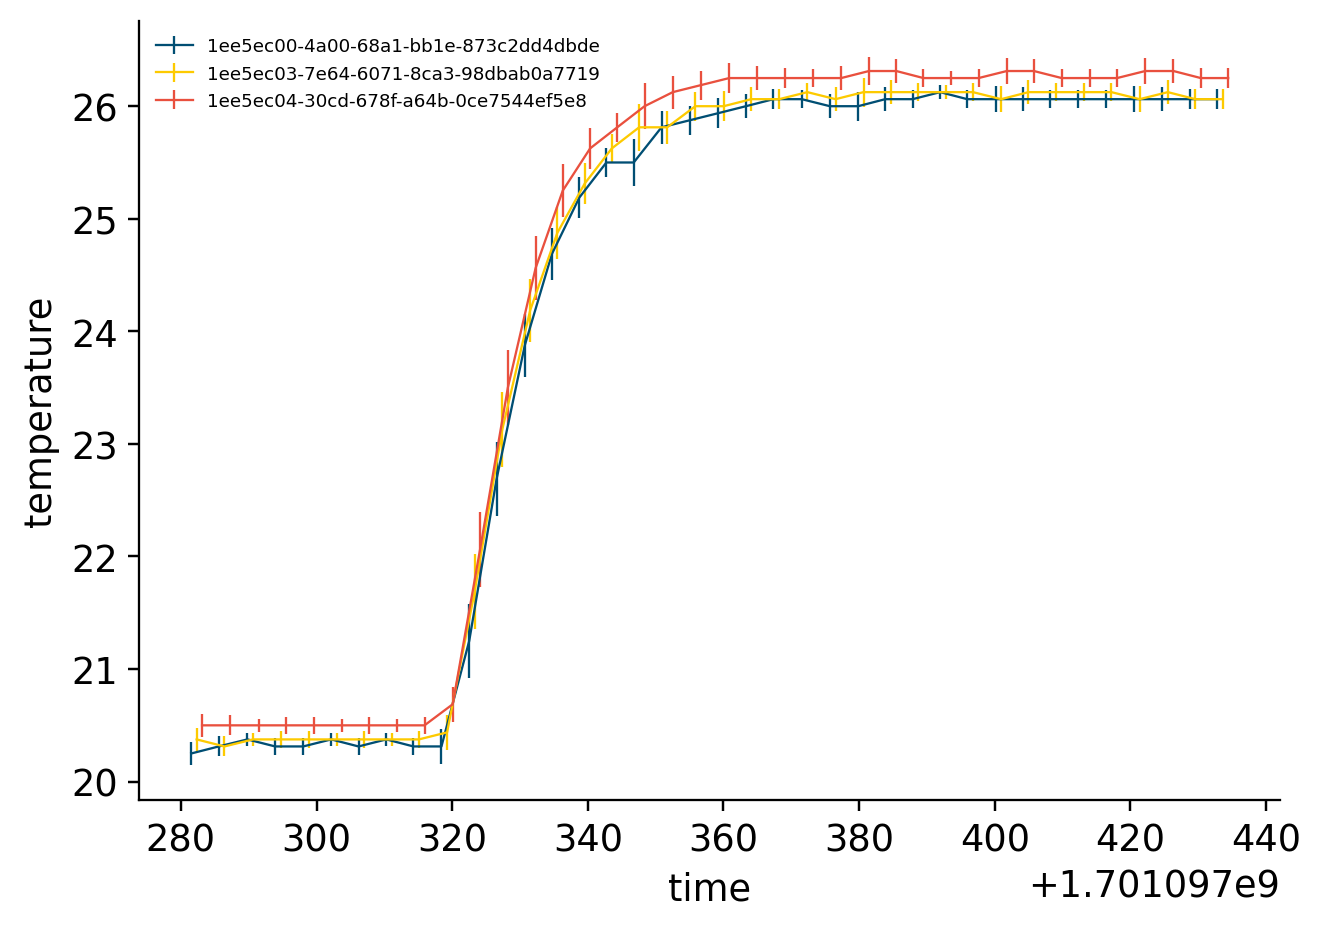

In [178]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time([data_dict["temperature"][index_calorimeter], mean_std_calorimeter],data_dict["timestamp"][index_calorimeter], data_dict["name"][index_calorimeter], "time", "temperature" )

# DONE #

#### (iv) Metadaten auslesen

In [179]:
# TODO: Read mass of the sample from the metadata of the experiment.

path_p = "data/Probe016/probe_PDC016_1ee8d293-e79a-6fc7-af1d-6bc687c09658.json"
with open(path_p, 'r') as f:
  p16 = json.load(f)
sample_mass = p16["probe"]["mass"]["value"]
print(sample_mass)


# DONE #

226


#### (v) Anfangs- und Endwert der Temperatur

In [180]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

threshold = 33/data_dict["timestamp"][0][-1]
temperature_mix, temperature_start_water = utility.get_start_end_temperature(mean_std_calorimeter[0], threshold) 
print(temperature_mix, temperature_start_water)

# DONE #

26.166666666666668 20.375


In [181]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(mean_std_heater[0][0:10])
print(temperature_start_sample)

# DONE #

79.84539473684211


#### (vi) spezifische Wärmekapazität bestimmen

In [182]:
# TODO: Calulate specific heat capacity of the sample.

sample_mass_kg = sample_mass/1000
sample_heat_capacity = calorimeter_constant*(temperature_mix-temperature_start_water)/(sample_mass_kg*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [183]:
print(sample_heat_capacity)


1118.236379944037


## Diskussion
Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage. Wie wirkt sich die mit der Probe aus dem Heißwasserbad transportierte Wassermenge auf das Ergebnis aus? Welche weiteren Fehlerquellen gibt es?

Die spezifische Wärmekapazität von PVC ist am größten, darauf folgt die von Aluminium und dann die von Edelstahl. Dementsprechend speichert PVC am besten die aufgenommene Wärme und Edelstahl am schlechtesten.

Bei Recherche nach den anerkannten spezifischen Wärmekonstanten der Stoffe fällt eine teils strake Diskrepanz auf, was darauf schließen lässt, das sich mit HIlfe des Versuchs kein genaues Ergebnis erzielen lässt, da es einige Punkte gibt an den unbetrachtete Verluste auftreten können.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Es zeigt sich, dass um wirklich genaue Ergebnisse erzielen zu können alle Faktoren mit einbezogen werden müssten und wir bei einem so einfachen Versuchsaufbau nur Werte in Annäherung bekommen.